<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/pandas/pandas_drop_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Drop Outliers in Pandas Data

Numerical data that is too many standard deviations away from the mean could be considered an **outlier**.  Here we show do to delete outliers.


Here we use the **Z-Score Method** and **Interquartile Range (IQR) Method**

The z-score is, where χ is the data value μ is the mean and σ is the standard deviation.  This converts data values to number of standard deviations (std).


$$z = \frac{x - \mu}{\sigma}$$

## Two Approaches to Eliminating Outliers

**1. Interquartile Range (IQR) Method**:
- Calculate the IQR, which is the difference between the third quartile (Q3) and the first quartile (Q1).
- Define outliers as data points that are below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR.
- This method is robust to outliers and is commonly used for skewed distributions.

**2. Z-Score Method**:
- Calculate the z-score for each data point, which represents how many standard deviations the data point is away from the mean.
- Define outliers as data points with z-scores beyond a certain threshold, such as |z| > 3 or |z| > 2 depending on the desired level of stringency.
- This method is more sensitive to outliers and assumes a normal distribution of the data.

## Review of the Normal Curve

This normal curve, copied from https://petemichaud.github.io/2015/07/16/normal-random.html, shows standard deviations.  This is a frequency distribution.  That is the probability plot.  Since a single dot has a probability of almost zero, we speak of the probability that data is in a range when talking about real numbers.  The probability that the data point is between -1 and 0 std is 34.31%.

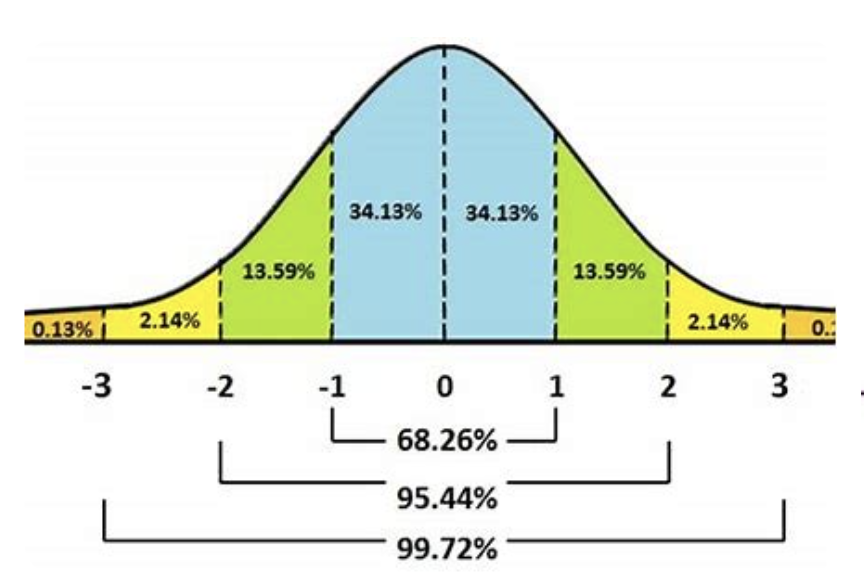

First we create some random data.  The salary is drawn from a standard normal distributions using `abs(int(random.gauss(mean, std)))`.  We also generate a random number from 1 to 5 which when is equal to 5 we set the salary to np.NaN (not a number).

In [21]:
import numpy as np
import pandas as pd

import random

def makedata():
  mean=10000
  std=25

  # this code creates random data.  It adds invalid and missing values to give us data to work with.

  cols = [("name", str), ("education", str),
     ("age", np.int8), ("city",str), ("id", np.int8), ("email", str), ("salary", np.int8),
        ("citizen", ["Y", "N"])]

  words = [np.NaN, "", "abc", "def", "ghi", "jkl", "mno", "pqr"]

  records = []

  for i in range(20):

    data = {}

    for c in cols:

      if c[1] == np.int8:
        if random.randint(0,5)==5:
            data[c[0]] = np.NaN
        else:
            data[c[0]] = abs(int(random.gauss(mean, std)))

      if c[0] == "citizen":
        if random.randint(0,5)==5:
            data[c[0]] = random.randint(0,10)
        else:
            data[c[0]] =c[1][random.randint(0,1)]

      if c[1] == str and c[0] != "citizen":
        data[c[0]] = words[random.randint(0,len(words)-1)]

      if (c[0] == "salary") & (random.randint(0,5)==0):
            data[c[0]] = 1000000

      if (c[0] == "salary") & (random.randint(0,5)==0):
            data[c[0]] = 30000

      if (c[0] == "age"):
          data[c[0]] = random.randint(20,25)

    records.append(data)

  df=pd.DataFrame(records)

  return df

df = makedata()
df

name education  age city        id email   salary citizen
0   ghi       jkl   20      10011.000   jkl    10002       N
1   ghi       mno   22  mno  9999.000   NaN     9992       Y
2   jkl       pqr   20  mno 10013.000   jkl    10022       Y
3   pqr       abc   24  pqr 10003.000   mno  1000000       7
4   pqr       NaN   25  def  9995.000   mno    30000       8
5   ghi       NaN   25  mno  9994.000   mno     9973       Y
6   def       jkl   25  ghi  9968.000   ghi    10020       N
7   mno       pqr   24  mno 10029.000   def    10012       N
8             jkl   25  ghi       NaN   NaN    10001       N
9   pqr       mno   24  mno 10016.000        1000000       Y
10  abc       pqr   23      10024.000   pqr    30000       Y
11  NaN       ghi   23  abc 10001.000   mno    30000       N
12  jkl       jkl   24  pqr 10034.000   pqr  1000000       N
13  def       jkl   23  ghi 10004.000   jkl     9944       0
14  abc       mno   20  ghi  9992.000   mno    10012       N
15  abc             21  jkl 10031.000   ghi  1000000       N
16  pqr       mno   20  def       NaN   NaN  1000000       N
17  ghi       mno   25  jkl 10005.000   ghi    30000      10
18  mno       def   21  def 10011.000   abc    10004       Y
19  jkl       jkl   25  jkl  9981.000          30000       N

Here we illustrate why we want to clean our data before we do data science.  We show that the mean will be skewed by NaN data by showing the mean calculated both with and without NaN values.

In [ ]:
salaries.info()

In [ ]:
# drop NaN and recompute
salaries.dropna(inplace=True)

In [ ]:
print("mean after drop NaN=", salaries["salary"].mean())

In [ ]:
salaries.info()

In [ ]:
# check is any salaries are zero.  use df since we copied salaries to that
# in the first step so it is not affected by drop

df.loc[df['salary'] < 1]


In [ ]:
# calculate mean before we add outlier
# because otherwise outlier messes up the mean
# this perfectly illustrates the goal of data cleansing


mean = salaries['salary'].mean()
std = salaries['salary'].std()
print(("mean=%i std=%i") % (mean, std))

what salary we give such that the z-score is 3.5, i.e., an outlier

to figure this out solve z-score equation for x=3.5

$$z = \frac{x - \mu}{\sigma}$$




3.5 = (x - mean) / std

3.5 * std = (x - mean)

3.5 * std = x - mean


3.5 * std + mean = x

x = 3.5 * std + mean




In [ ]:
rich=3.5 * std + mean
print(rich)

In [ ]:
outlier = pd.DataFrame({
    "salary" : rich,
    "name" : "Oleskii"
},index=[21])

salaries = pd.concat([outlier,salaries])

In [ ]:
salaries['zScore']= salaries['salary'].apply(lambda x : (x - mean) / std)
salaries

In [ ]:
# show outliers
salaries.loc[abs(salaries['salary'] - mean) > 3 * std]

In [ ]:
10072 - mean

In [ ]:
3 * std

In [ ]:
# drop outliers, too many standard deviations away
# if the income - mean > 2 std the replace then drop the row
# remeber to use inplace=True



# Define threshold for outliers (e.g., values more than 2 standard deviations away from the mean)
threshold = 3

# calculate
# find with .loc
# drop
# inplace=True


salaries.drop(salaries.loc[abs(salaries['salary'] - mean) > 2 * std].index, inplace=True)

salaries


In [ ]:
salaries.info()

# For Next Time: Interquartile Range (IQR) Method

**1. Interquartile Range (IQR) Method**:
- Calculate the IQR, which is the difference between the third quartile (Q3) and the first quartile (Q1).
- Define outliers as data points that are below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR.
- This method is robust to outliers and is commonly used for skewed distributions.


In [7]:
import numpy as np


q = np.array(
    [25,50,75,100]
)

q1=np.quantile(q, [0.25,0.5,0.75,1])
q1


# [25,50,75,100]



array([ 43.75,  62.5 ,  81.25, 100.  ])

In [9]:
# iqr definition is The IQR is the difference between Q3 and Q1, and it is a measure of the spread of the data

q3=q1[2]
q1=q1[0]

iqr = q3 - q1
iqr

37.5

In [12]:
# Define outliers as data points that are below Q1 - 1.5 × IQR or above Q3 + 1.5 × IQR.

outlier_min =  q1 - 1.5 * iqr
outlier_max =  q3 + 1.5 * iqr

(outlier_min, outlier_max)

# maybe what this is saying is if we had a value > 137.5 we would throw it away because it is an outlier


(-12.5, 137.5)

In [33]:
df = makedata()
df.dropna(subset=['salary'],inplace=True)
before=df
df


name education  age city        id email      salary citizen
0   def       mno   23  jkl 10002.000   def    9962.000       2
1   jkl       ghi   20  pqr 10027.000   jkl    9957.000       N
2   abc       pqr   25  jkl 10019.000   abc   10010.000       Y
3   abc       abc   24  pqr 10045.000   abc   10025.000       N
4   jkl       def   23  ghi  9961.000   abc   10010.000       Y
5   NaN             22  jkl 10001.000   mno   30000.000       7
6   mno       NaN   20  mno 10004.000   mno    9979.000       Y
7   jkl             22  mno  9969.000   pqr   30000.000       N
8   jkl       jkl   20  NaN  9974.000   jkl   10017.000       Y
10  pqr             24  NaN 10005.000         10004.000       Y
11  def       jkl   22  abc  9993.000   NaN    9975.000       N
12  jkl       NaN   25  mno       NaN   jkl 1000000.000       Y
13  def       def   20  mno  9970.000   jkl 1000000.000       N
14  def       abc   22  NaN 10021.000   NaN    9934.000       N
15  pqr             20  pqr 10018.000   NaN 1000000.000       Y
16            NaN   21       9977.000   pqr   10011.000       Y
17  NaN       jkl   22  def       NaN   ghi   10025.000       N
19  pqr       def   21  ghi  9969.000   mno   30000.000       6

In [34]:
np.quantile(df['salary'].to_numpy(),[0.25,0.5,0.75])

array([ 9985.25, 10014.  , 30000.  ])

In [35]:
df['salary'].describe()

count        18.000
mean     178328.278
std      378190.790
min        9934.000
25%        9985.250
50%       10014.000
75%       30000.000
max     1000000.000
Name: salary, dtype: float64

In [36]:
q1=df['salary'].describe()['25%']
q2=df['salary'].describe()['50%']
q3=df['salary'].describe()['75%']

print("q1=%i q2=%i q3=%i" % (q1, q2, q3))

q1=9985 q2=10014 q3=30000


In [37]:
iqr = q3 - q1
iqr

20014.75

In [50]:


df=df.loc[(df['salary'] < (q1 - (1.5 * iqr))) |  (df['salary']  > (q3 + (1.5 * iqr)))]
df

name education  age city        id email      salary citizen  lower  upper
12  jkl       NaN   25  mno       NaN   jkl 1000000.000       Y  False   True
13  def       def   20  mno  9970.000   jkl 1000000.000       N  False   True
15  pqr             20  pqr 10018.000   NaN 1000000.000       Y  False   True

In [44]:
df['lower']=df['salary'].apply(lambda l : l < (q1 - (1.5 * iqr)))

df['lower']

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
19    False
Name: lower, dtype: bool

In [47]:
q3 - (1.5 * iqr)

-22.125

In [48]:
df['upper']=df['salary'].apply(lambda l : l > (q3 + (1.5 * iqr)))
df['upper']

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
10    False
11    False
12     True
13     True
14    False
15     True
16    False
17    False
19    False
Name: upper, dtype: bool

In [49]:
df.loc[(df['salary'] < (q1 - (1.5 * iqr))) |  (df['salary']  > (q3 + (1.5 * iqr))) , ['salary', 'upper', 'lower']]

salary  upper  lower
12 1000000.000   True  False
13 1000000.000   True  False
15 1000000.000   True  False

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 19
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       16 non-null     object 
 1   education  15 non-null     object 
 2   age        18 non-null     int64  
 3   city       15 non-null     object 
 4   id         16 non-null     float64
 5   email      15 non-null     object 
 6   salary     18 non-null     float64
 7   citizen    18 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.3+ KB


In [40]:
before.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 19
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       16 non-null     object 
 1   education  15 non-null     object 
 2   age        18 non-null     int64  
 3   city       15 non-null     object 
 4   id         16 non-null     float64
 5   email      15 non-null     object 
 6   salary     18 non-null     float64
 7   citizen    18 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 1.3+ KB


In [ ]:
q1 - 1.5 * iqr

In [ ]:
iqr

In [ ]:
import matplotlib.pyplot as plt


# Cut the data into quartiles
quartiles = pd.cut(df['salary'], bins=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Group the data by quartiles
grouped = quartiles.groupby(quartiles)

# Plot histogram for each quartile
fig, ax = plt.subplots()
for name, group in grouped:
    ax.hist(group, bins=10, label=name)

ax.legend(title='Quartile')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Grouped by Quartile')
plt.show()

In [ ]:
quartiles.value_counts()